# Modeling profitability (binary classification)

## Imports

In [1]:
cd ..

/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools


In [57]:
import pandas as pd 
import numpy as np
from src.classification import Classification, ConfusionMatrix
from src.eda import EDA

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [3]:
ls *

LICENSE.md             README.md              yellowbrick-notes.pdf

data:
bottle.csv*        clean_data_v3.csv

notebooks:
1-rlr-EDA-dev.ipynb                   3-rlr-classification-dev-Copy1.ipynb
2-rlr-regression-dev.ipynb            film-classn-ref.ipynb

src:
__pycache__/       classification.py  eda.py             regression.py


In [4]:
df = pd.read_csv('data/clean_data_v3.csv')

In [112]:
df.head()

,Unnamed: 0,Unnamed: 0.1,budget,id,release_date,revenue,runtime,title,genre,profit,made_money,cast_0,cast_1,cast_2,cast_3,cast_4,director,writer,releases,cast_rev,cast_prof,cast_films,cast_prof_films,dir_rev,dir_prof,dir_films,dir_prof_films,writ_rev,writ_prof,writ_films,writ_prof_films,compet_cast_rev,compet_cast_prof,compet_cast_films,compet_cast_prof_films,compet_dir_rev,compet_dir_prof,compet_dir_films,compet_dir_prof_films,compet_writ_rev,compet_writ_prof,compet_writ_films,compet_writ_prof_films,adj_budget,cast_dir_avg_rev,month,year,decade,season,fall,spring,summer,winter,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,None,Romance,Science Fiction,Thriller,War,Western,compet_budget,compet_cast_dir_avg_rev,compet_adj_budget
0,0,0,4000000.0,5,1995-12-09,4300000.0,98.0,Four Rooms,Crime,300000.0,1,Tim Roth,Antonio Banderas,Jennifer Beals,Madonna,Marisa Tomei,Allison Anders,Allison Anders,30,5.238649e+07,3.573649e+07,9.0,5.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.017498e+08,7.562609e+07,15.166667,9.333333,4.046212e+07,2.647601e+07,1.833333,1.000000,1.744469e+07,8.161356e+06,1.333333,0.500000,2.219325e+07,2.619325e+07,12,1995,1990,winter,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.500000e+07,7.110595e+07,3.610595e+07
1,1,1,11000000.0,11,1977-05-25,775398007.0,121.0,Star Wars,Adventure,764398007.0,1,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Mayhew,Anthony Daniels,George Lucas,George Lucas,67,4.420000e+06,2.820000e+06,1.0,1.0,71218500.0,7.044150e+07,2.0,2.0,7.121850e+07,70441500.0,2.0,2.0,1.818402e+07,1.419652e+07,5.000000,4.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.547333e+07,-4.526667e+06,1.000000,0.000000,2.681925e+07,3.781925e+07,5,1977,1970,summer,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.300000e+06,9.092010e+06,4.792010e+06
2,2,2,94000000.0,12,2003-05-30,940335536.0,100.0,Finding Nemo,Animation,846335536.0,1,Albert Brooks,Ellen DeGeneres,Alexander Gould,Willem Dafoe,Brad Garrett,Andrew Stanton,Andrew Stanton,62,6.991528e+07,4.389605e+07,15.0,9.0,0.0,0.000000e+00,0.0,0.0,4.744807e+08,366147328.0,3.0,3.0,7.257531e+07,3.761663e+07,13.600000,9.800000,3.538779e+07,2.266113e+07,1.400000,1.200000,3.469014e+07,2.580164e+07,0.700000,0.700000,-5.904236e+07,3.495764e+07,5,2003,2000,summer,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.516619e+07,5.398155e+07,1.881536e+07
3,3,3,55000000.0,13,1994-07-06,677945399.0,142.0,Forrest Gump,Comedy,622945399.0,1,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Sally Field,Robert Zemeckis,Eric Roth,39,5.077868e+07,3.707660e+07,14.0,12.0,192273625.0,1.551070e+08,6.0,6.0,0.000000e+00,0.0,0.0,0.0,7.807074e+07,6.059212e+07,13.142857,10.857143,4.421214e+07,3.217999e+07,1.142857,1.142857,1.145317e+08,9.707339e+07,1.571429,1.571429,6.652615e+07,1.215262e+08,7,1994,1990,summer,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.071429e+07,6.114144e+07,1.042715e+07
4,4,4,15000000.0,14,1999-09-15,356296601.0,122.0,American Beauty,Drama,341296601.0,1,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,Mena Suvari,Sam Mendes,Alan Ball,54,5.776690e+07,2.069283e+07,16.0,12.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,6.881550e+07,4.022940e+07,11.666667,8.166667,1.988473e+07,8.995846e+06,0.500000,0.333333,7.765796e+07,6.334546e+07,0.666667,0.583333,1.388345e+07,2.888345e+07,9,1999,1990,fall,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.105000e+07,4.435012e+07,1.330012e+07


#### **"Adjusted budget"** is defined as the average of the cast + director's average box office revenue to date, minus the budget of the current film they're part of. In theory this should give us some information about whether the film's budget makes sense considering the past success of the cast and director. We already have this column pertaining to films themselves, now creating it for avg competitors' adjusted budget:

## Drop non-numerical and unnecessary cols

In [114]:
X_cols = ['budget',
          'runtime', 
          'releases', 
          'cast_rev', 
          'cast_prof', 
          'cast_films', 
          'cast_prof_films', 
          'dir_rev',
          'dir_prof', 
          'dir_films', 
          'dir_prof_films', 
          'writ_rev', 
          'writ_prof', 
          'writ_films', 
          'writ_prof_films', 
          'adj_budget',
          'cast_dir_avg_rev',
          'fall', 'spring', 'summer', 'winter',
          'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'None', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
          'compet_cast_rev', 'compet_cast_prof', 'compet_cast_films', 'compet_cast_prof_films', 'compet_dir_rev', 'compet_dir_prof', 'compet_dir_films', 'compet_dir_prof_films', 'compet_writ_rev', 'compet_writ_prof', 'compet_writ_films', 'compet_writ_prof_films', 
          'compet_budget',
          'compet_adj_budget',
          'compet_cast_dir_avg_rev']
y_col = 'made_money' #does this work without being a list?

In [115]:
X = df.loc[:, X_cols].values
y = df.loc[:, y_col].values.ravel() 
#need to use ravel for y array to be correct shape for analysis, 
#otherwise np.mean(y_pred == y_test) does not work properly later

In [116]:
print(X.shape)
print(y.shape)

(3600, 54)
(3600,)


In [117]:
np.mean(y == 1)

0.7013888888888888

In [118]:
clf = Classification(df, X_cols, y_col)

In [119]:
np.logspace(1, -2, 10)

array([10.        ,  4.64158883,  2.15443469,  1.        ,  0.46415888,
        0.21544347,  0.1       ,  0.04641589,  0.02154435,  0.01      ])

# Testing Logistic Reg

In [120]:
%%time
alphas = np.logspace(1, -2, 10) #inverse of regularization strength for Logistic Reg
l1_ratios = [0, .5, 1]
folds = 5
model, preds = clf.elastic_net(alphas, l1_ratios, folds)

-------- BEST MODEL --------
LogisticRegression(C=0.021544346900318846, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=1,
                   max_iter=1000, multi_class='warn', n_jobs=-1,
                   penalty='elasticnet', random_state=None, solver='saga',
                   tol=0.0001, verbose=0, warm_start=False)
-------- ---------- --------
CPU times: user 540 ms, sys: 118 ms, total: 658 ms
Wall time: 47.6 s


releases                   0.927876
summer                     0.102056
Comedy                     0.096666
Horror                     0.088843
dir_prof                   0.055400
winter                     0.023496
Family                     0.008129
compet_dir_prof_films      0.004185
writ_prof_films            0.000000
Crime                      0.000000
Animation                  0.000000
Adventure                  0.000000
spring                     0.000000
cast_dir_avg_rev           0.000000
adj_budget                 0.000000
compet_cast_dir_avg_rev    0.000000
writ_films                 0.000000
compet_adj_budget          0.000000
writ_rev                   0.000000
dir_prof_films             0.000000
dir_films                  0.000000
dir_rev                    0.000000
cast_prof_films            0.000000
cast_films                 0.000000
cast_prof                  0.000000
runtime                    0.000000
writ_prof                  0.000000
budget                     0

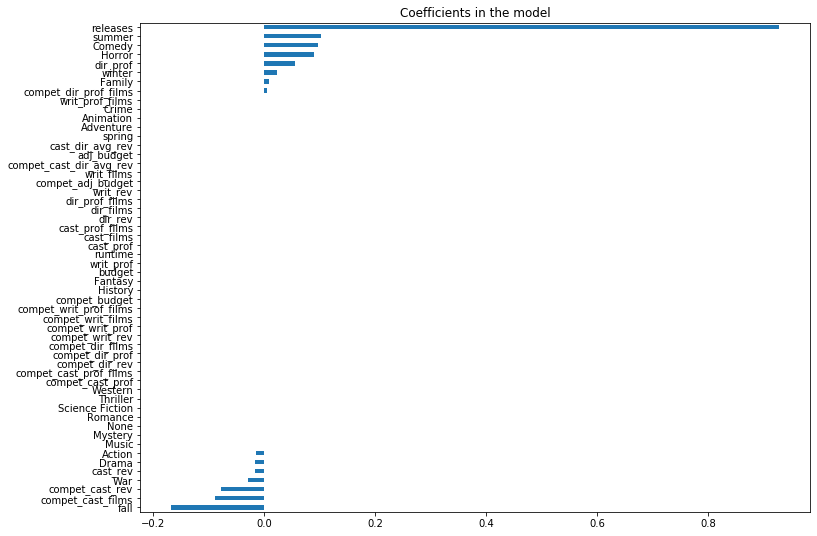

In [121]:
%%time
clf.coefficient_plot(model)

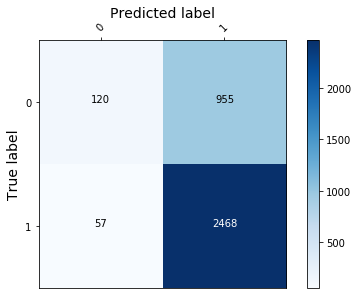

Accuracy =      0.719
Precision =     0.721
Recall (TPR) =  0.977
Fallout (FPR) = 0.888

---- Classification Report ----
              precision    recall  f1-score   support

           0       0.68      0.11      0.19      1075
           1       0.72      0.98      0.83      2525

    accuracy                           0.72      3600
   macro avg       0.70      0.54      0.51      3600
weighted avg       0.71      0.72      0.64      3600



In [122]:
cm = ConfusionMatrix(y, preds, model)
cm.plot_matrix()

# Testing Logistic Reg with imbalance=True

In [123]:
model, preds = clf.elastic_net(alphas, l1_ratios, folds, imbalanced=True)

-------- BEST MODEL --------
LogisticRegression(C=0.021544346900318846, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=1,
                   max_iter=1000, multi_class='warn', n_jobs=-1,
                   penalty='elasticnet', random_state=None, solver='saga',
                   tol=0.0001, verbose=0, warm_start=False)
-------- ---------- --------


releases                   0.927857
summer                     0.102057
Comedy                     0.096662
Horror                     0.088839
dir_prof                   0.055407
winter                     0.023495
Family                     0.008128
compet_dir_prof_films      0.004181
writ_prof_films            0.000000
Crime                      0.000000
Animation                  0.000000
Adventure                  0.000000
spring                     0.000000
cast_dir_avg_rev           0.000000
adj_budget                 0.000000
compet_cast_dir_avg_rev    0.000000
writ_films                 0.000000
compet_adj_budget          0.000000
writ_rev                   0.000000
dir_prof_films             0.000000
dir_films                  0.000000
dir_rev                    0.000000
cast_prof_films            0.000000
cast_films                 0.000000
cast_prof                  0.000000
runtime                    0.000000
writ_prof                  0.000000
budget                     0

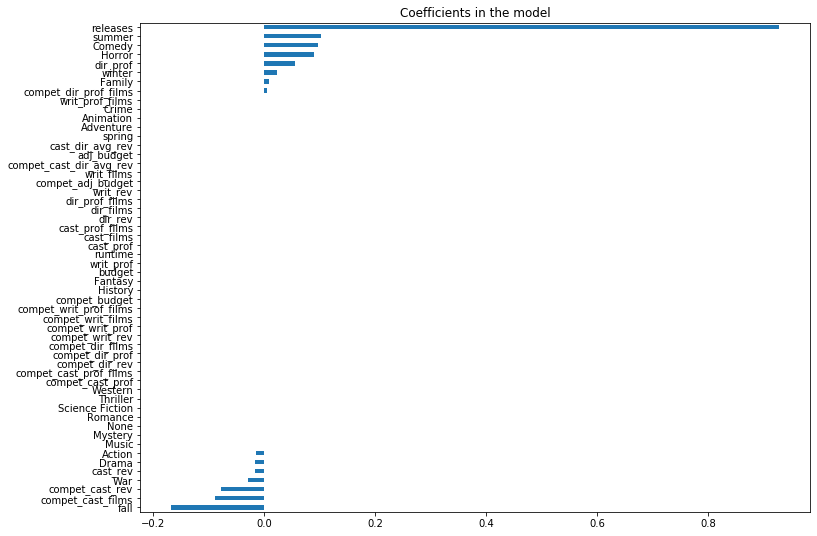

In [124]:
clf.coefficient_plot(model)

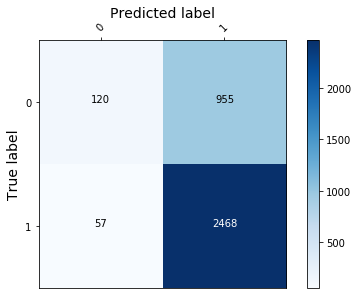

Accuracy =      0.719
Precision =     0.721
Recall (TPR) =  0.977
Fallout (FPR) = 0.888

---- Classification Report ----
              precision    recall  f1-score   support

           0       0.68      0.11      0.19      1075
           1       0.72      0.98      0.83      2525

    accuracy                           0.72      3600
   macro avg       0.70      0.54      0.51      3600
weighted avg       0.71      0.72      0.64      3600



In [125]:
cm = ConfusionMatrix(y, preds, model)
cm.plot_matrix()
#no difference from above -- success > fail balance not big enough? or doesn't matter?

# Testing LASSO plot

In [127]:
np.logspace(2, -3, 25)

array([1.00000000e+02, 6.18965819e+01, 3.83118685e+01, 2.37137371e+01,
       1.46779927e+01, 9.08517576e+00, 5.62341325e+00, 3.48070059e+00,
       2.15443469e+00, 1.33352143e+00, 8.25404185e-01, 5.10896977e-01,
       3.16227766e-01, 1.95734178e-01, 1.21152766e-01, 7.49894209e-02,
       4.64158883e-02, 2.87298483e-02, 1.77827941e-02, 1.10069417e-02,
       6.81292069e-03, 4.21696503e-03, 2.61015722e-03, 1.61559810e-03,
       1.00000000e-03])

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


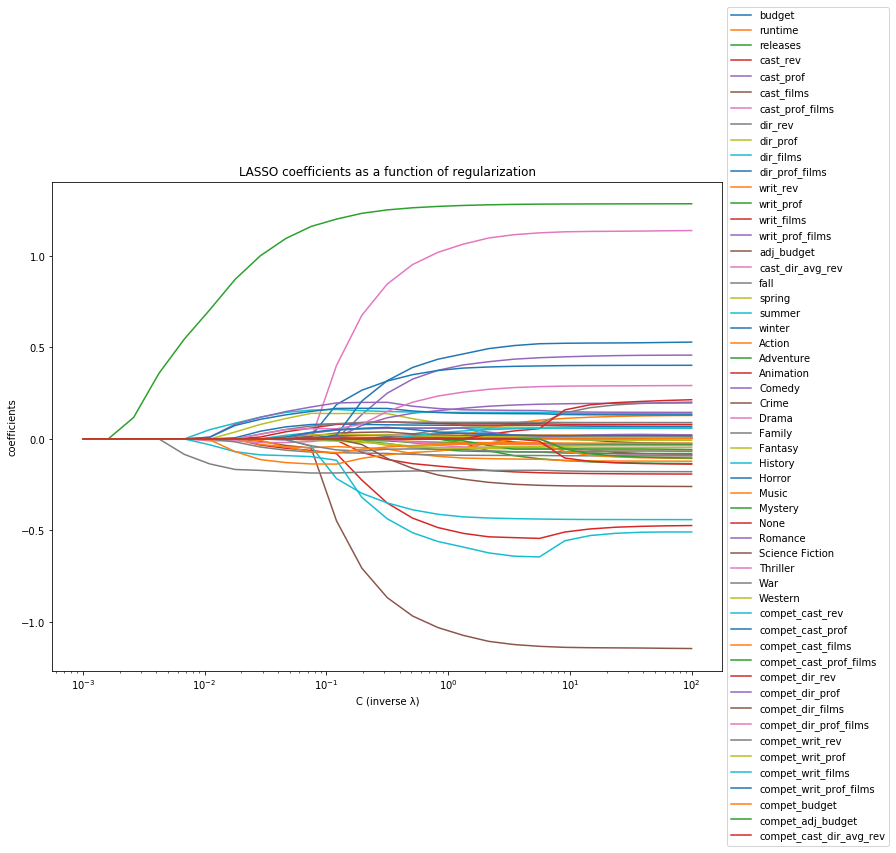

CPU times: user 18 s, sys: 128 ms, total: 18.1 s
Wall time: 18.4 s


In [128]:
%%time
clf.lasso_plot(np.logspace(2, -3, 25))

# Testing SGDClassifier

In [129]:
alphas = np.logspace(-3, 1, 25)
l1_ratios = [0, .5, 1]
folds = 5
model, preds = clf.elastic_net_sgd(alphas, l1_ratios, folds)

-------- BEST MODEL --------
SGDClassifier(alpha=0.0021544346900318843, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.5, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
-------- ---------- --------


releases                   1.232045
cast_prof_films            0.577155
dir_prof_films             0.280629
summer                     0.222787
cast_prof                  0.196272
compet_cast_prof           0.186240
Comedy                     0.158860
writ_prof_films            0.143393
dir_prof                   0.142964
Horror                     0.136900
Family                     0.132389
Animation                  0.115939
compet_dir_prof_films      0.107634
compet_writ_prof_films     0.079762
winter                     0.060277
compet_dir_prof            0.050715
runtime                    0.015916
writ_rev                   0.005549
Crime                      0.000000
compet_cast_dir_avg_rev    0.000000
spring                     0.000000
cast_dir_avg_rev           0.000000
adj_budget                 0.000000
writ_prof                  0.000000
dir_rev                    0.000000
compet_adj_budget          0.000000
budget                     0.000000
History                    0

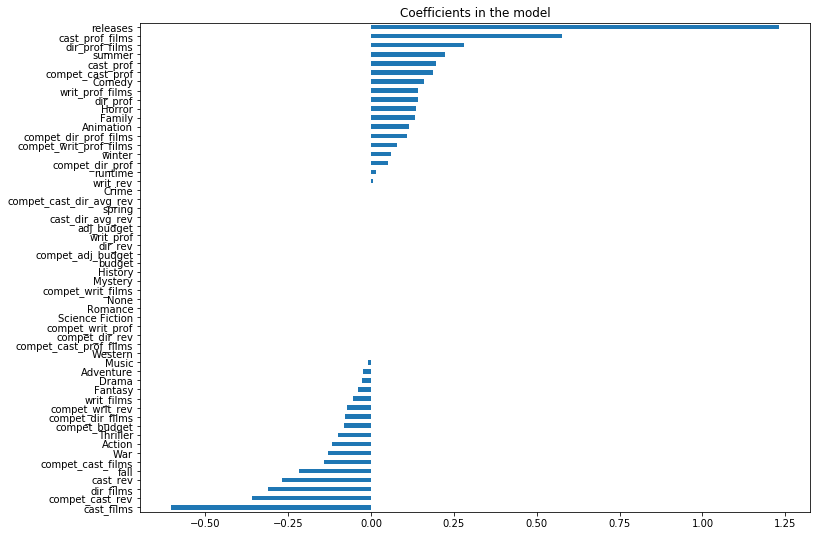

In [130]:
clf.coefficient_plot(model)

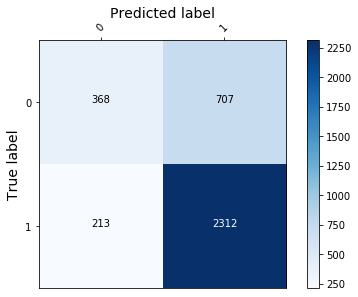

Accuracy =      0.744
Precision =     0.766
Recall (TPR) =  0.916
Fallout (FPR) = 0.658

---- Classification Report ----
              precision    recall  f1-score   support

           0       0.63      0.34      0.44      1075
           1       0.77      0.92      0.83      2525

    accuracy                           0.74      3600
   macro avg       0.70      0.63      0.64      3600
weighted avg       0.73      0.74      0.72      3600



In [131]:
cm = ConfusionMatrix(y, preds, model)
cm.plot_matrix()

# Curves

## ROC

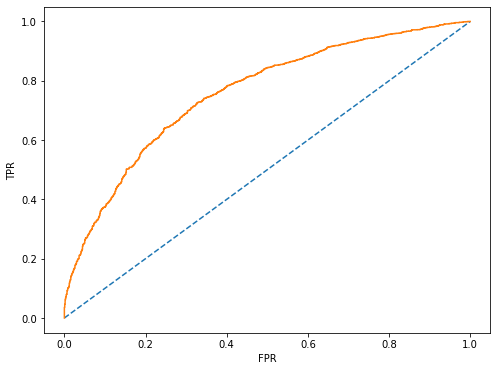

Best ratio w/ TPR > .5: 3.2891209852692587
    Decision threshold: 0.7543475829484761
                   TPR: 0.5017821782178218
                   FPR: 0.15255813953488373
CPU times: user 311 ms, sys: 5.51 ms, total: 316 ms
Wall time: 159 ms


/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools/src/classification.py:233: RuntimeWarning: invalid value encountered in double_scalars
  if tp/fp > best_ratio and tp/fp != float(inf):
/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools/src/classification.py:233: RuntimeWarning: divide by zero encountered in double_scalars
  if tp/fp > best_ratio and tp/fp != float(inf):


In [158]:
%%time
clf.roc_curve(model)

## PR

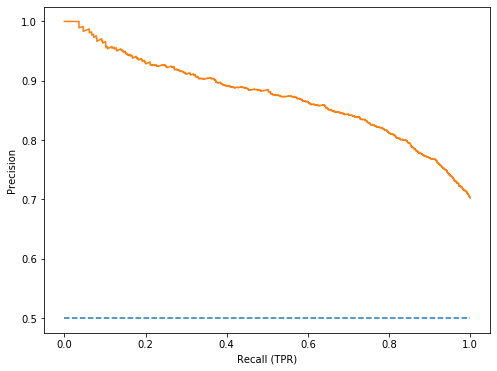

P/R ratio closest to 1: 0.9996041171813143
    Decision threshold: 0.5899685861868089
             Precision: 0.8095803642121931
                Recall: 0.80990099009901
[0.17417769 0.19309347 0.19334949 ... 0.99935129 0.99943681 0.99954901]
CPU times: user 304 ms, sys: 8.3 ms, total: 312 ms
Wall time: 272 ms


In [154]:
%%time
clf.pr_curve(model)

## Profit

In [169]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[df['made_money'] == 1]['profit'].describe()

count         2525.00
mean     105442135.01
std      174789654.73
min           4703.00
25%       12829644.00
50%       41837234.00
75%      121563139.00
max     2550965087.00
Name: profit, dtype: float64

In [170]:
df[df['made_money'] == 0]['profit'].describe()

count         1075.00
mean     -12788935.98
std       14708860.54
min     -119180039.00
25%      -16041730.50
50%       -8199698.00
75%       -3213656.00
max              0.00
Name: profit, dtype: float64

In [202]:
#assign costs / benefits
cost_bene = {
'tp': 41837234.00,  #median profit of profitable movies
'fp': -81996980.0,  #median loss of unprofitable movies x10 for weighting extreme loss aversion
'tn': 0,            #not making an unprofitable movie costs us nothing (could also consider opp. cost)
'fn': 0 }           #not making a profitable movie costs us nothing (could also consider opp. cost)

In [203]:
thresholds = np.linspace(.01, .99, 25)

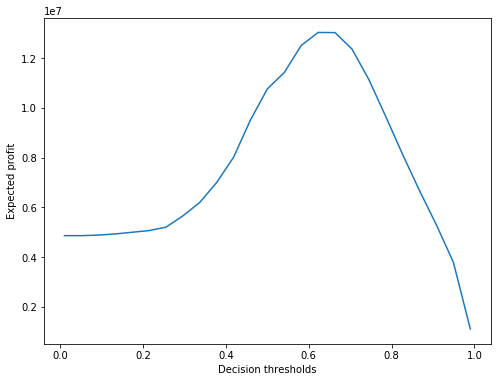

Estimated max avg profit: 13033685.729444444
      Decision threshold: 0.6225


In [205]:
clf.profit_curve(thresholds, model, cost_bene)

# Classification EDA

In [78]:
X_cols = ['budget',
          'runtime', 
          'releases', 
          'cast_rev', 
          'cast_prof', 
          'cast_films', 
          'cast_prof_films', 
          'dir_rev',
          'dir_prof', 
          'dir_films', 
          'dir_prof_films', 
          'writ_rev', 
          'writ_prof', 
          'writ_films', 
          'writ_prof_films', 
          'adj_budget',
          'cast_dir_avg_rev',
          'fall', 'spring', 'summer', 'winter']
y_col = 'made_money'

In [82]:
df_eda = df[X_cols + [y_col]]

In [83]:
df_eda.head()

,budget,runtime,releases,cast_rev,cast_prof,cast_films,cast_prof_films,dir_rev,dir_prof,dir_films,dir_prof_films,writ_rev,writ_prof,writ_films,writ_prof_films,adj_budget,cast_dir_avg_rev,fall,spring,summer,winter,made_money
0,4000000.0,98.0,30,5.238649e+07,3.573649e+07,9.0,5.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,2.219325e+07,2.619325e+07,0,0,0,1,1
1,11000000.0,121.0,67,4.420000e+06,2.820000e+06,1.0,1.0,71218500.0,7.044150e+07,2.0,2.0,7.121850e+07,70441500.0,2.0,2.0,2.681925e+07,3.781925e+07,0,0,1,0,1
2,94000000.0,100.0,62,6.991528e+07,4.389605e+07,15.0,9.0,0.0,0.000000e+00,0.0,0.0,4.744807e+08,366147328.0,3.0,3.0,-5.904236e+07,3.495764e+07,0,0,1,0,1
3,55000000.0,142.0,39,5.077868e+07,3.707660e+07,14.0,12.0,192273625.0,1.551070e+08,6.0,6.0,0.000000e+00,0.0,0.0,0.0,6.652615e+07,1.215262e+08,0,0,1,0,1
4,15000000.0,122.0,54,5.776690e+07,2.069283e+07,16.0,12.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.388345e+07,2.888345e+07,1,0,0,0,1


In [65]:
# df_eda[df_eda['made_money'] == 1]['dir_prof']

In [84]:
df_eda['budget'].dtype in ('float64', 'int64')

True

In [98]:
eda = EDA(df_eda, X_cols, y_col)

/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools/src/eda.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if self.df[col].dtype in ('float64', 'int64'):


CPU times: user 1.9 s, sys: 13.9 ms, total: 1.92 s
Wall time: 1.92 s


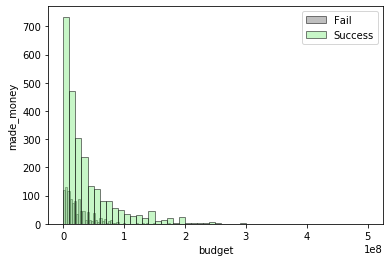

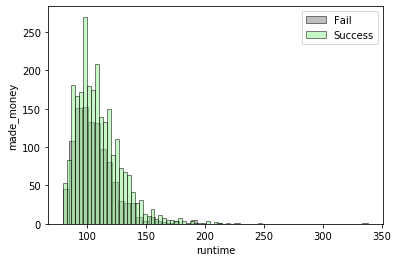

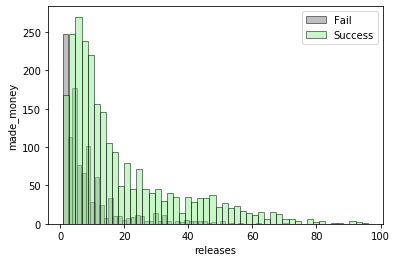

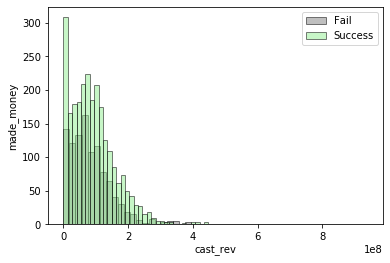

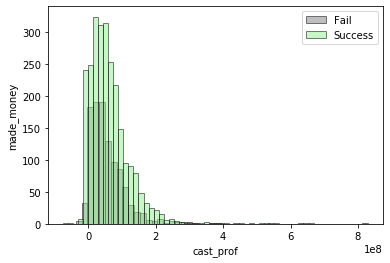

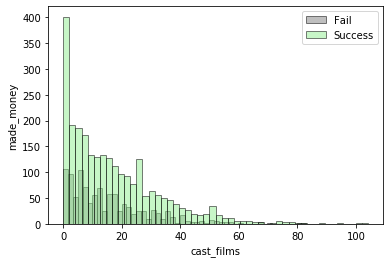

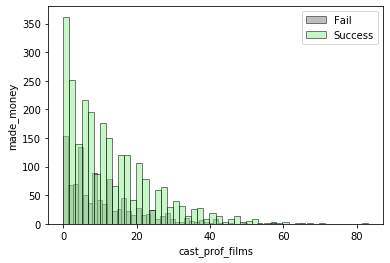

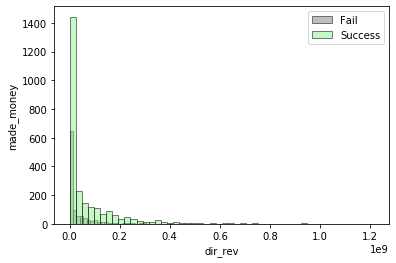

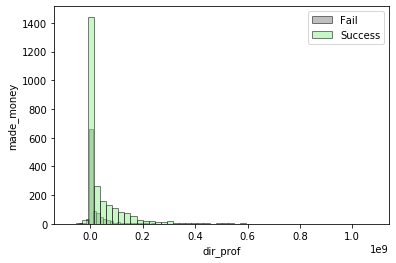

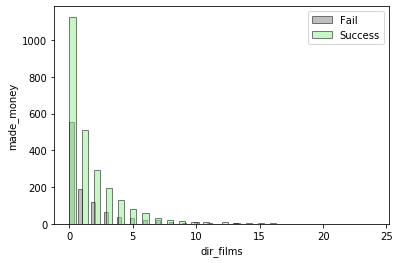

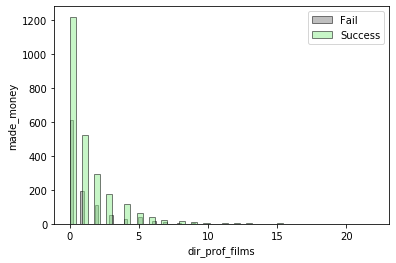

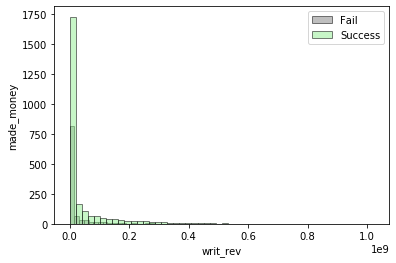

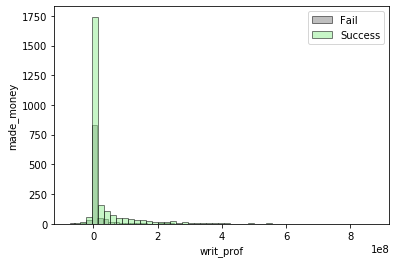

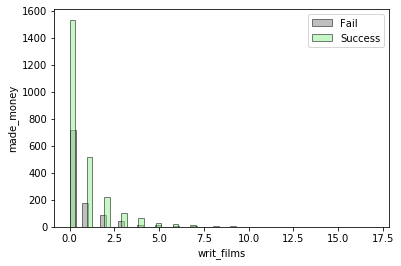

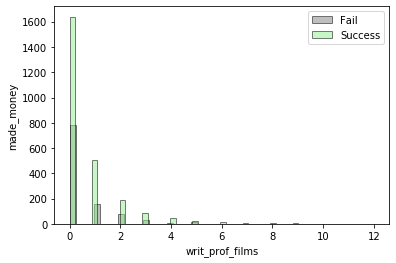

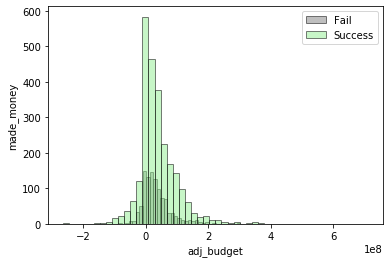

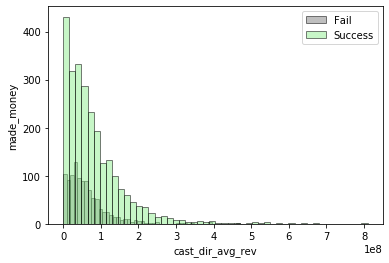

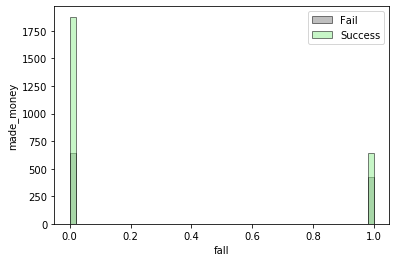

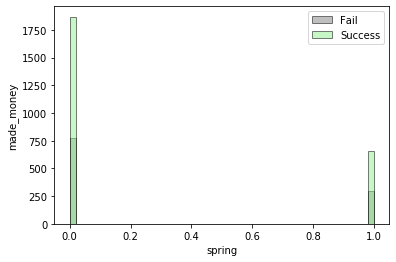

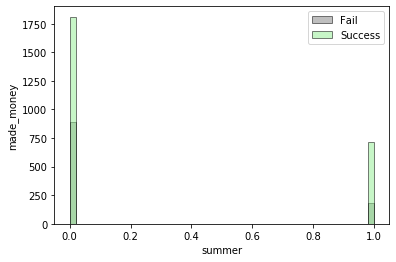

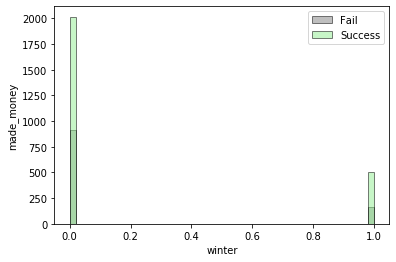

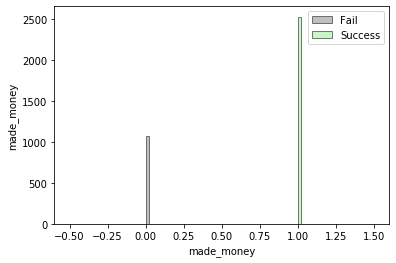

In [102]:
%%time
eda.histograms(hue=True)

/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools/src/eda.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


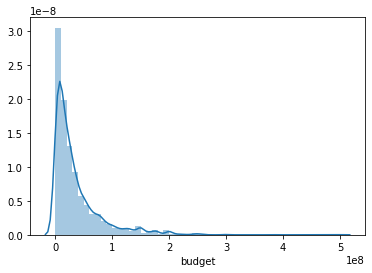

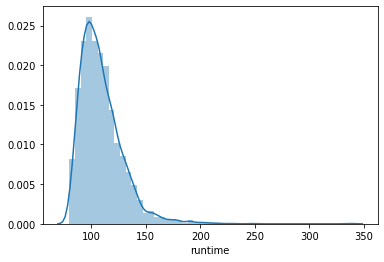

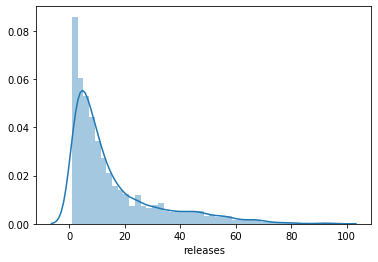

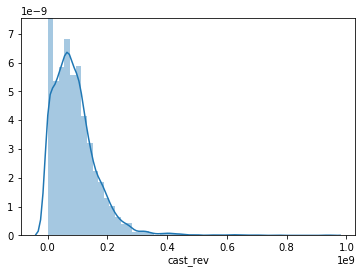

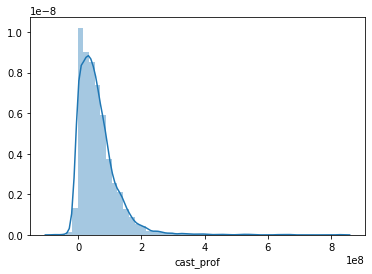

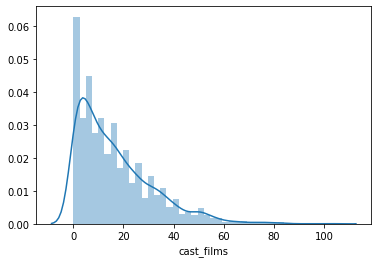

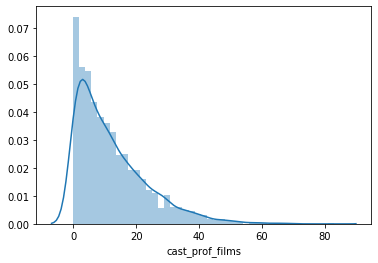

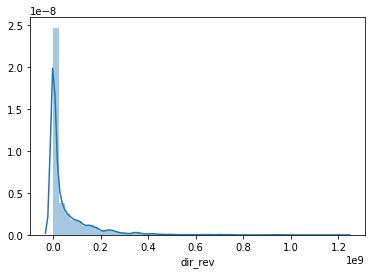

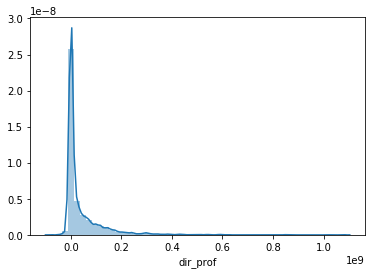

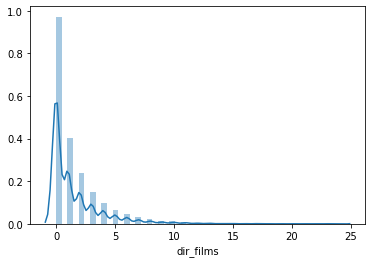

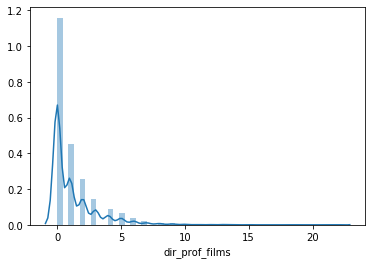

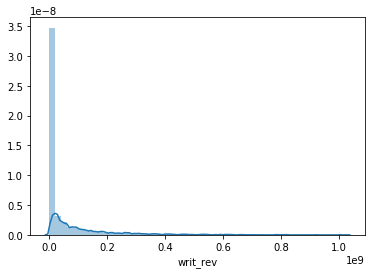

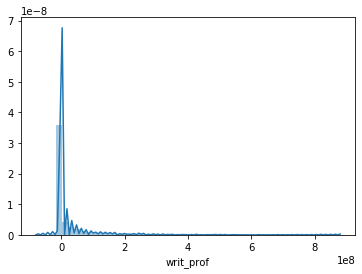

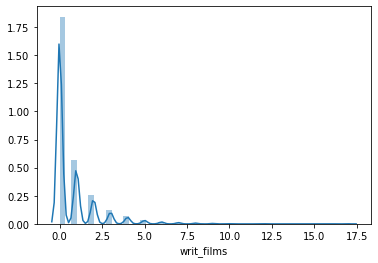

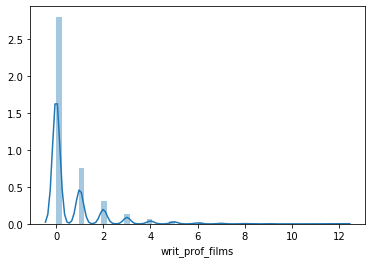

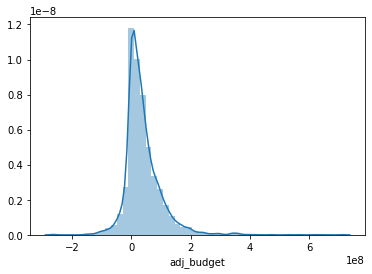

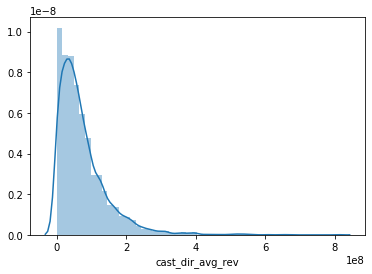

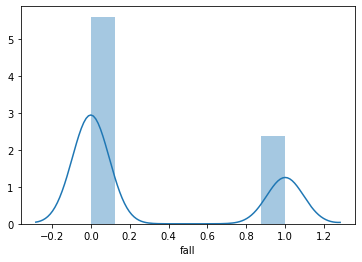

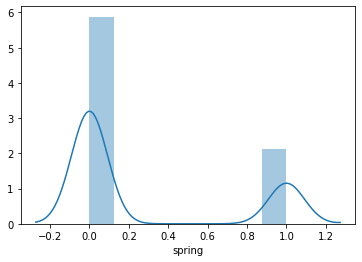

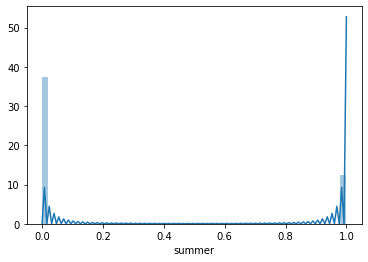

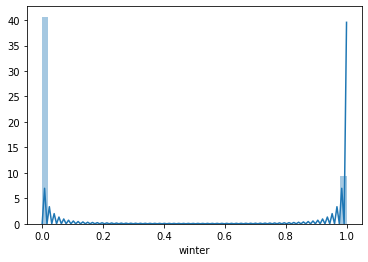

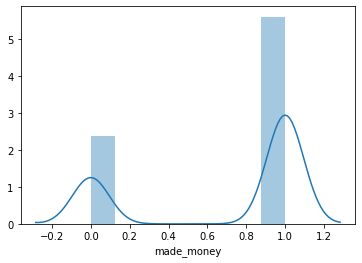

In [103]:
eda.histograms()

/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools/src/eda.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools/src/eda.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


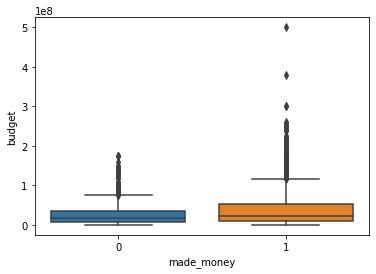

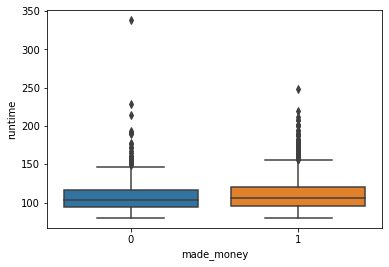

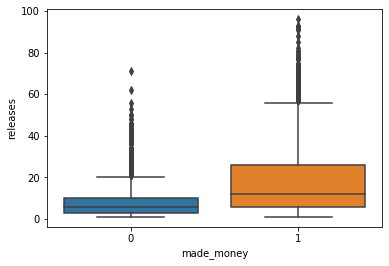

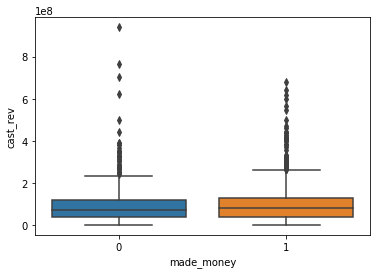

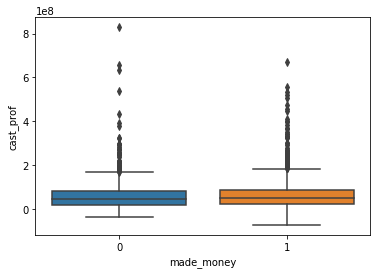

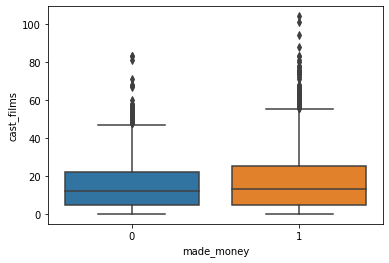

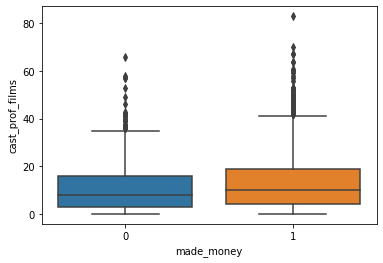

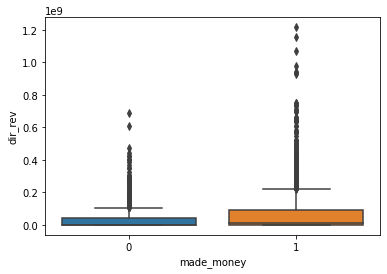

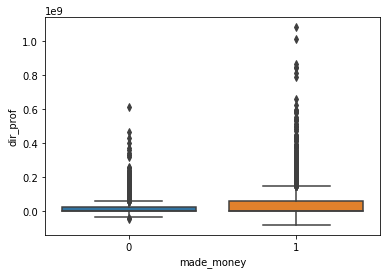

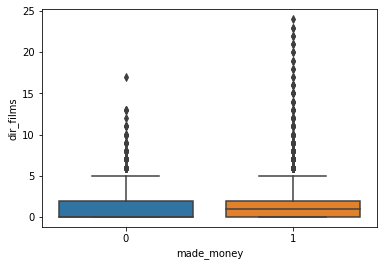

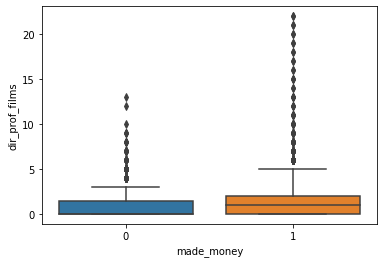

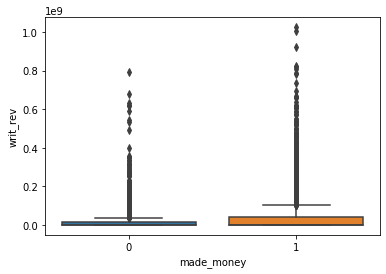

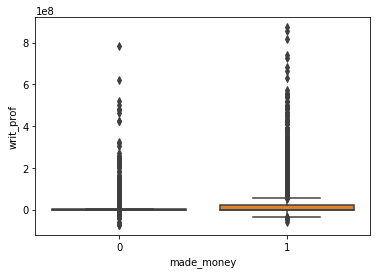

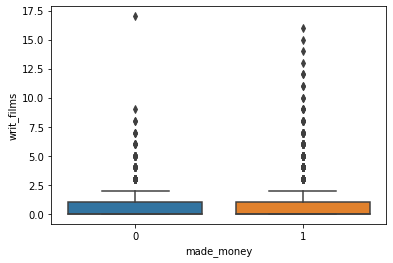

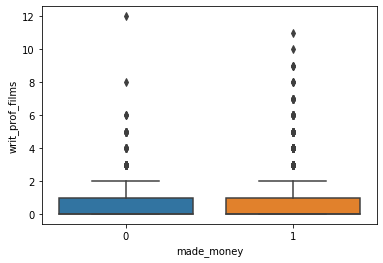

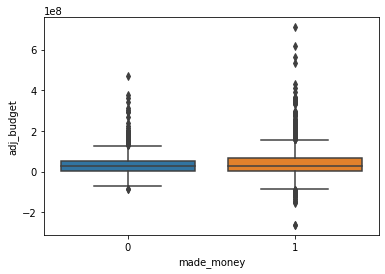

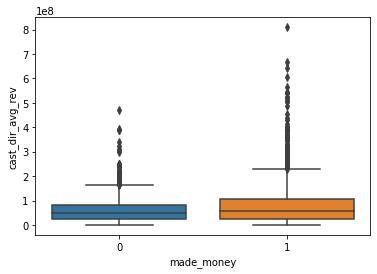

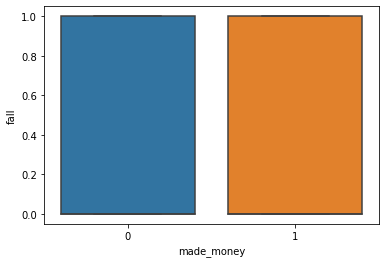

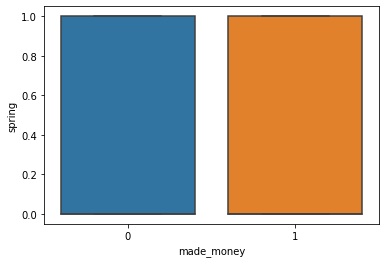

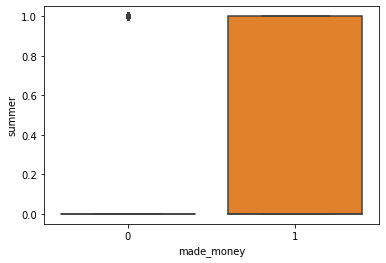

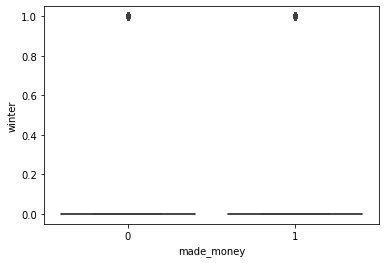

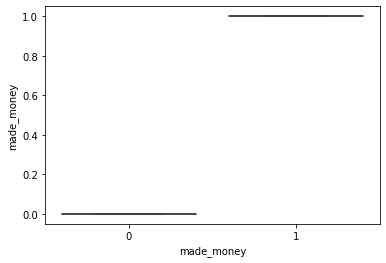

In [104]:
eda.boxplots(hue='made_money')

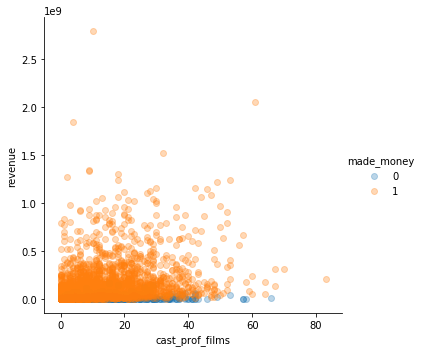

In [110]:
import seaborn as sns
sns.lmplot(x='cast_prof_films', y='revenue', data=df, fit_reg=False, hue='made_money', scatter_kws={'alpha':0.3})

### A model with mediocre accuracy, high precision, and low fallout may be best from biz perspective. If we only correctly identify half of all profitable films, but if it's right 90+ pct of the time when it does predict profit, then user would generally avoid losing money, following Warren Buffet's #1 and #2 rule of investing.